In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importing the dataset
df = pd.read_csv('OnlineNewsPopularity.csv')

# remove left space from column headers
df.columns = df.columns.str.replace(' ', '')

#drop non-predictive items
df=df.drop(['url', 'timedelta'], axis=1)

#drop class data
df=df.drop(['n_non_stop_words',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world', 
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend'
], axis=1)



df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,0.815385,4,2,1,0,4.680365,5,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,0.791946,3,1,1,0,4.913725,4,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,0.663866,3,1,1,0,4.393365,6,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,0.665635,9,0,1,0,4.404896,7,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,0.540890,19,19,20,0,4.682836,7,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
#separate descriptive variables X (independents) and Y (dependent)
X = df.iloc[:, :43]
y = df[["shares"]].apply(np.log)
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.663594,0.815385,4,2,1,0,4.680365,5,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9,255,0.604743,0.791946,3,1,1,0,4.913725,4,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9,211,0.575130,0.663866,3,1,1,0,4.393365,6,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9,531,0.503788,0.665635,9,0,1,0,4.404896,7,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13,1072,0.415646,0.540890,19,19,20,0,4.682836,7,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, test_size=0.2)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
X_train_scaled

array([[-1.13421147,  0.7979635 , -0.56205853, ...,  0.10994235,
        -1.01802656, -0.24640392],
       [ 0.75754774, -0.72846969,  0.86483089, ...,  0.67502016,
        -0.92976607,  0.41640302],
       [ 0.28460794, -0.7178251 ,  0.81922851, ..., -0.26677619,
         0.83544358, -0.68827521],
       ...,
       [ 0.28460794, -1.16489758, -3.8550156 , ..., -2.52708744,
         0.30588068,  1.96295254],
       [ 0.75754774,  0.16567528, -0.00564812, ...,  0.10994235,
        -0.22368221, -0.24640392],
       [-0.18833187, -0.76040343,  0.9311366 , ...,  1.0517387 ,
        -1.54758946,  0.85827431]])

In [9]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

score = regressor.score(X_train_scaled, y_train_scaled)
print(f"R2 Score: {score}")

R2 Score: 0.11018664258833


In [137]:
from sklearn.metrics import mean_squared_error

predictions = regressor.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = regressor.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8726855863517194, R2: 0.09659534338336573


In [125]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)[0:5]
y_pred

array([[7.71514841],
       [7.67227625],
       [7.22453438],
       [7.24004297],
       [7.64616722]])

In [126]:
print(f'Accuracy: {regressor.score(X_test, y_test)}')

Accuracy: 0.09659768657191214


In [103]:
columns = []
for column in df:
    columns.append(column)
columns

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

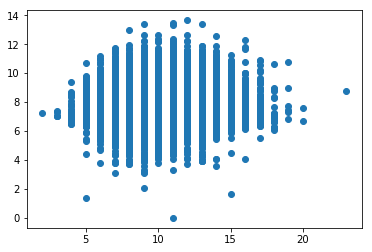

n_tokens_title


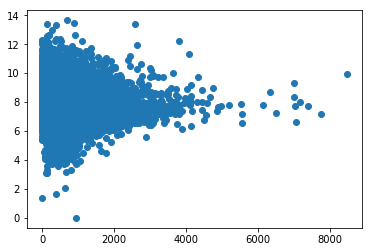

n_tokens_content


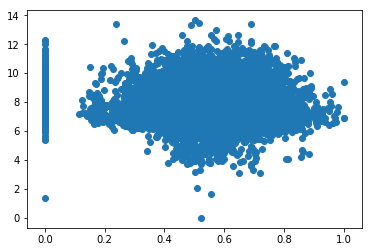

n_unique_tokens


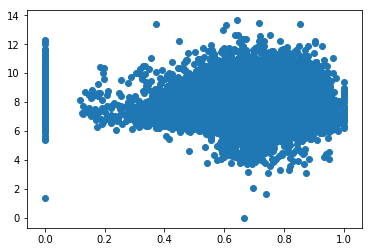

n_non_stop_unique_tokens


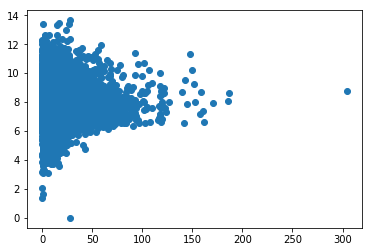

num_hrefs


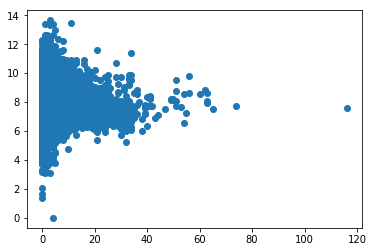

num_self_hrefs


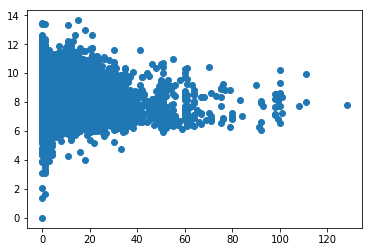

num_imgs


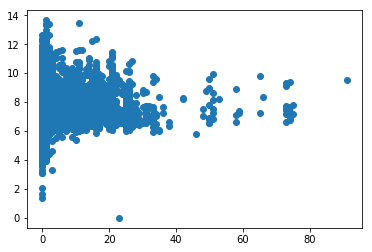

num_videos


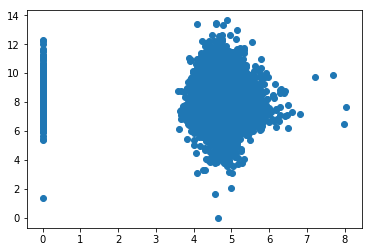

average_token_length


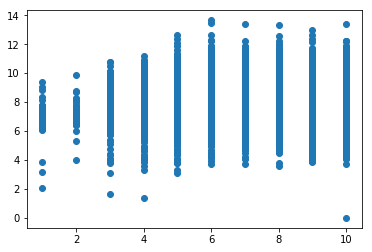

num_keywords


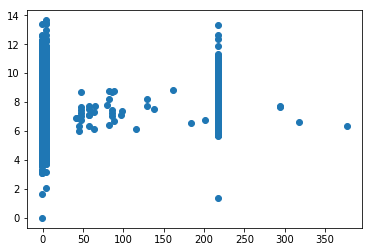

kw_min_min


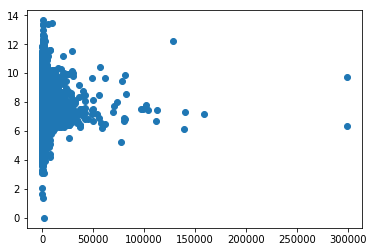

kw_max_min


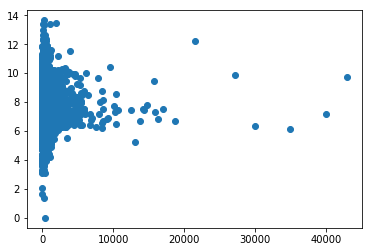

kw_avg_min


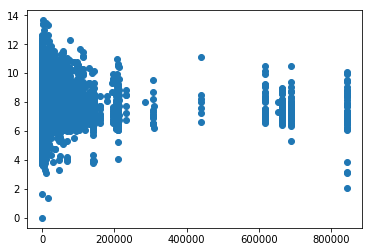

kw_min_max


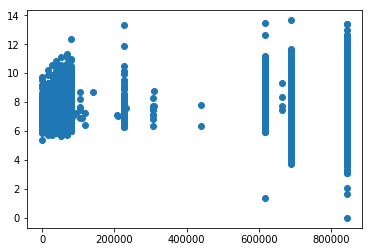

kw_max_max


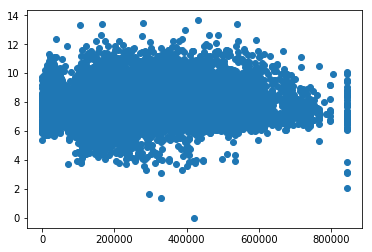

kw_avg_max


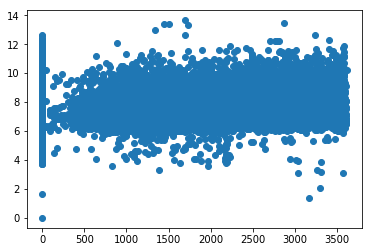

kw_min_avg


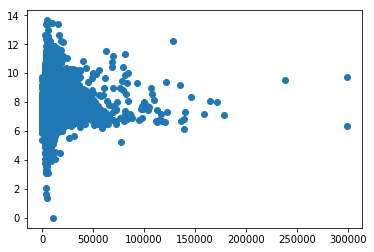

kw_max_avg


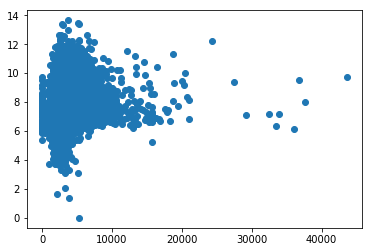

kw_avg_avg


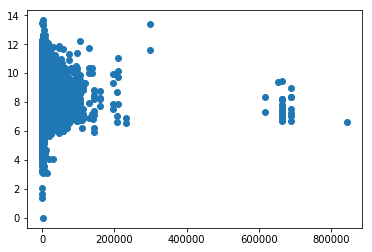

self_reference_min_shares


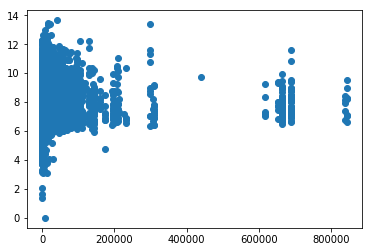

self_reference_max_shares


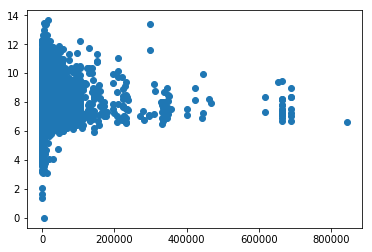

self_reference_avg_sharess


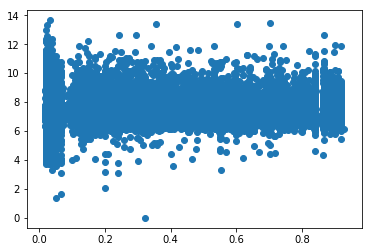

is_weekend


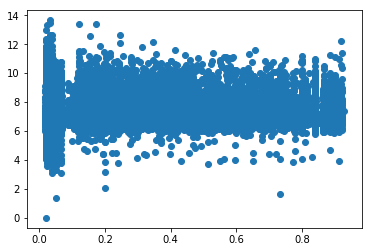

LDA_00


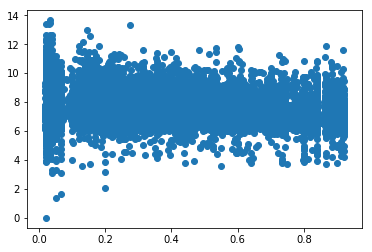

LDA_01


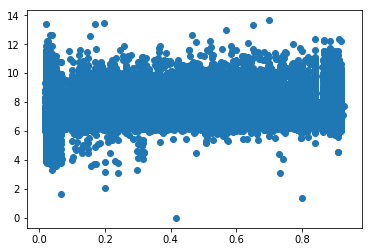

LDA_02


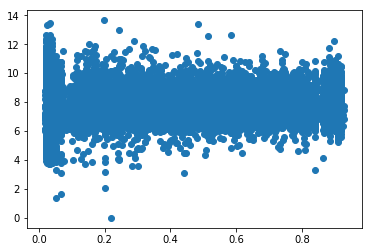

LDA_03


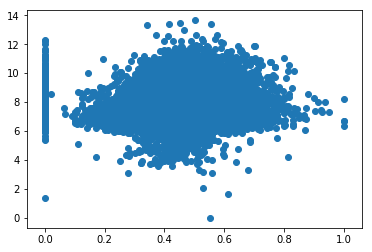

LDA_04


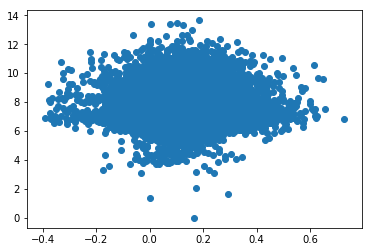

global_subjectivity


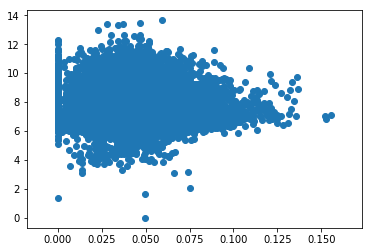

global_sentiment_polarity


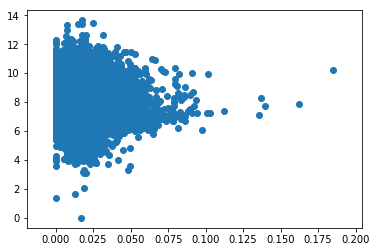

global_rate_positive_words


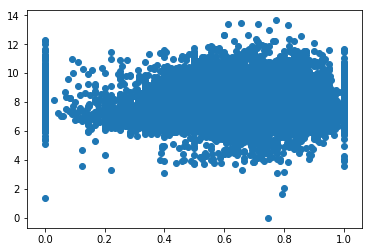

global_rate_negative_words


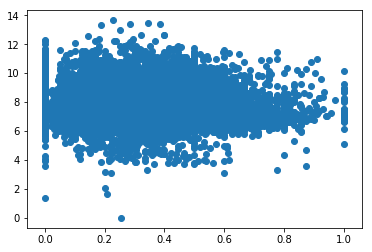

rate_positive_words


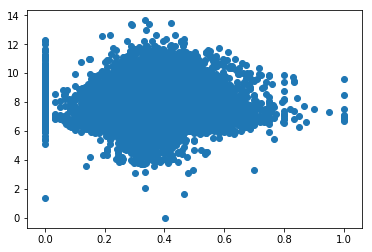

rate_negative_words


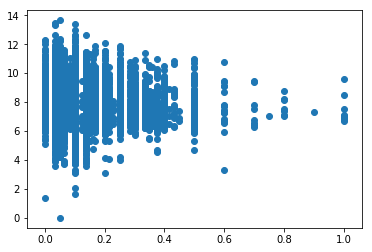

avg_positive_polarity


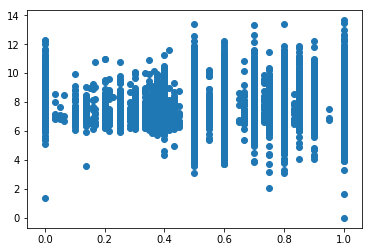

min_positive_polarity


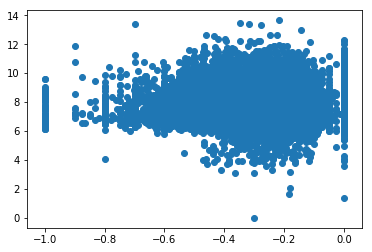

max_positive_polarity


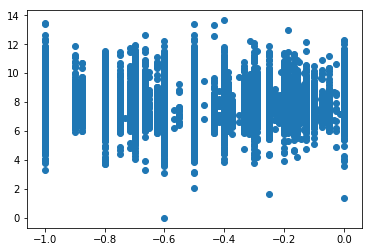

avg_negative_polarity


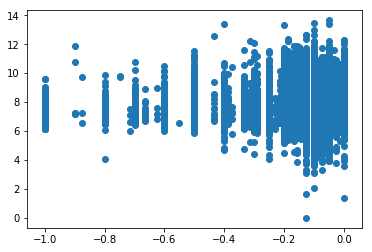

min_negative_polarity


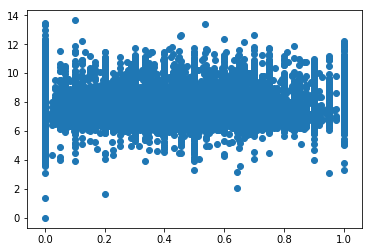

max_negative_polarity


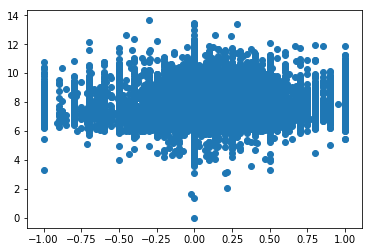

title_subjectivity


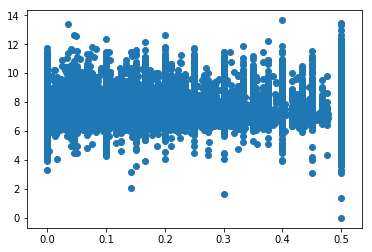

title_sentiment_polarity


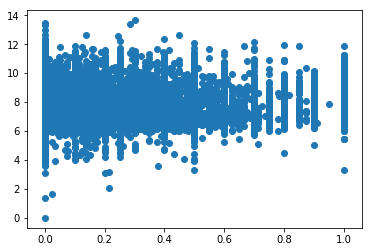

abs_title_subjectivity


In [127]:
import matplotlib.pyplot as plt

for n in range(43):
    pltX = df.iloc[:, n].values
    plty = df[["shares"]].apply(np.log)
    plt.scatter(pltX, plty)
    plt.show()
    print(columns[n])

In [ ]:
# drop redundant data
df=df.drop([
 'n_non_stop_unique_tokens',
 'kw_min_min',
 'kw_max_min',
 'kw_min_max',
 'kw_max_max',
 'kw_min_avg',
 'kw_max_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'min_positive_polarity',
 'max_positive_polarity',
 'min_negative_polarity',
 'max_negative_polarity'
], axis=1)